<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/CNN_Pixel_Segmentation_Quality_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_images_df = pd.read_csv(defect_and_no_defect_path)#, nrows = 5)

In [ ]:
defect_class_mask_df = pd.read_csv(train_path)#, nrows = 5)

In [ ]:
defect_class_mask_df

,ImageId,ClassId,EncodedPixels
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...
...,...,...,...
5743,c12842f5e.jpg,3,88 23 342 29 596 34 850 39 1105 44 1361 46 161...
5744,2222a03b3.jpg,3,63332 4 63587 11 63841 20 64096 27 64351 35 64...
5745,b43ea2c01.jpg,1,185024 7 185279 11 185535 12 185790 13 186045 ...
5746,1bc37a6f4.jpg,3,303867 1 304122 3 304376 6 304613 3 304630 9 3...


In [ ]:
all_images_df

,ImageID,label
0,0002cc93b.jpg,1
1,0007a71bf.jpg,1
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,1
4,0014fce06.jpg,1
...,...,...
12992,0482ee1d6.jpg,0
12993,04802a6c2.jpg,0
12994,03ae2bc91.jpg,0
12995,04238d7e3.jpg,0


In [ ]:
defect_class_mask_df['mask'] = 1 # or train['ClassId'].map(lambda x: 1) or using any column
defect_class_mask_df

,ImageId,ClassId,EncodedPixels,mask
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...,1
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...,1
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...,1
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...,1
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...,1
...,...,...,...,...
5743,c12842f5e.jpg,3,88 23 342 29 596 34 850 39 1105 44 1361 46 161...,1
5744,2222a03b3.jpg,3,63332 4 63587 11 63841 20 64096 27 64351 35 64...,1
5745,b43ea2c01.jpg,1,185024 7 185279 11 185535 12 185790 13 186045 ...,1
5746,1bc37a6f4.jpg,3,303867 1 304122 3 304376 6 304613 3 304630 9 3...,1


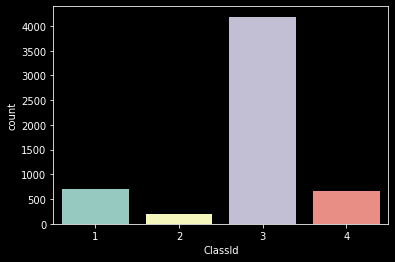

In [ ]:
plt.style.use('dark_background')
sns.countplot(data = defect_class_mask_df, x = 'ClassId');

In [ ]:
defect_class_mask_df.groupby('ImageId').size()

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
                ..
ffcf72ecf.jpg    1
fff02e9c5.jpg    1
fffe98443.jpg    1
ffff4eaa8.jpg    1
ffffd67df.jpg    1
Length: 5474, dtype: int64

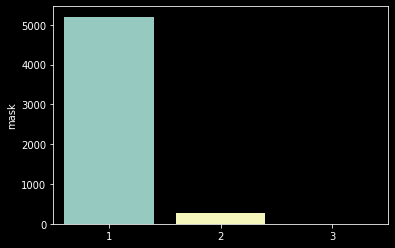

In [ ]:
sns.barplot(y = defect_class_mask_df.groupby('ImageId')['mask'].sum().value_counts(), x = [1,2,3])


In [ ]:
i = 0
for imageid, mask in test.iterrows():
    while i < 10:
        print(imageid)
        print(mask)
        i += 1

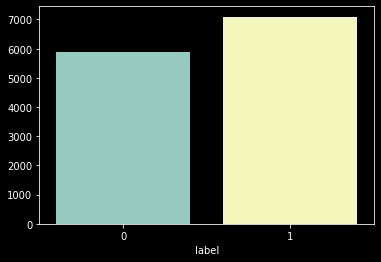

In [ ]:
sns.barplot(y = all_images_df.groupby('label').size(), x = all_images_df.groupby('label').size().index)

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/udemy - ml ai ds refresher/Data Science for Business Package/6. Maintenance Department/train_images'

In [ ]:
from google.colab.patches import cv2_imshow # display image in window
import os
from skimage import io # scikit image module to read and write images

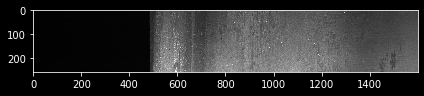

In [ ]:
io.imshow(os.path.join(train_dir, defect_class_mask_df['ImageId'][0]))

In [ ]:
io.imread(os.path.join(train_dir, defect_class_mask_df['ImageId'][0]))

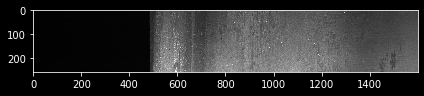

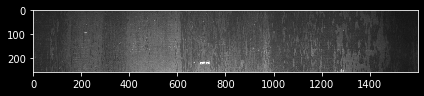

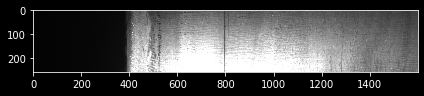

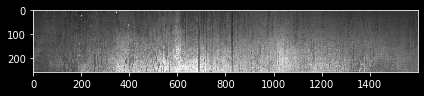

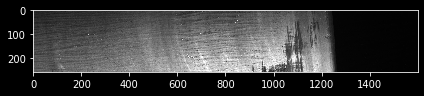

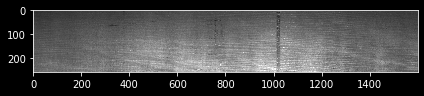

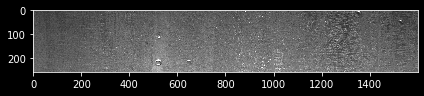

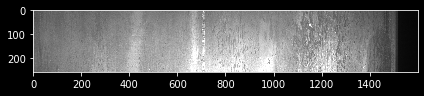

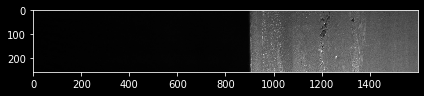

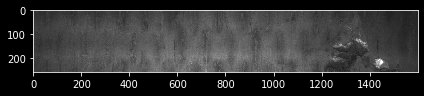

In [ ]:
for i in range(10):
    path_ = os.path.join(train_dir, defect_class_mask_df['ImageId'][i])
    plt.figure()
    io.imshow(path_)

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/udemy - ml ai ds refresher/Data Science for Business Package/6. Maintenance Department

/content/drive/MyDrive/Colab Notebooks/udemy - ml ai ds refresher/Data Science for Business Package/6. Maintenance Department


In [ ]:
from utilities import rle2mask, mask2rle

In [ ]:
sample_img_arr = io.imread(os.path.join(train_dir, defect_class_mask_df['ImageId'][10])) # to extract shape to use with rle2mask

In [ ]:
mask = rle2mask(rle = defect_class_mask_df['EncodedPixels'][10], 
         height = sample_img_arr.shape[0], 
         width = sample_img_arr.shape[1])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


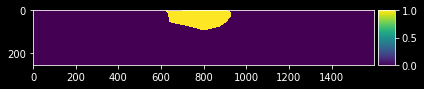

In [ ]:
io.imshow(mask);

In [ ]:
import cv2 # open cv pack

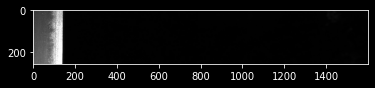

In [ ]:
sample_image = io.imread(os.path.join(train_dir, defect_class_mask_df['ImageId'][50]))
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image)

In [ ]:
mask1 = rle2mask(rle = defect_class_mask_df['EncodedPixels'][50], height = sample_image.shape[0], width = sample_image.shape[1])

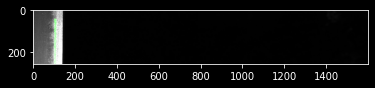

In [ ]:
sample_image[mask1 == 1, 1] = 255
plt.imshow(sample_image)

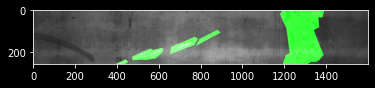

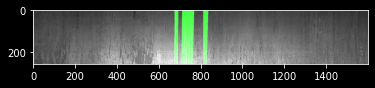

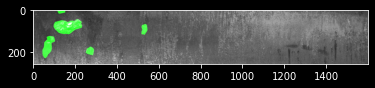

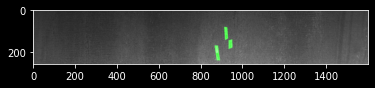

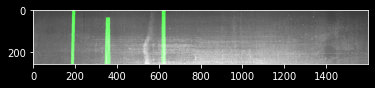

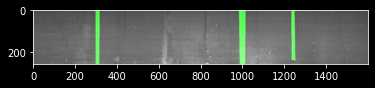

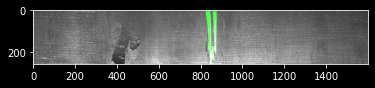

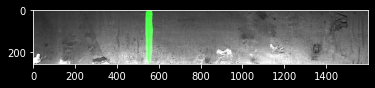

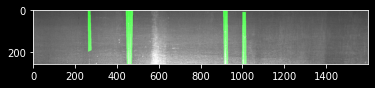

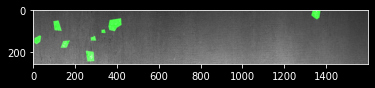

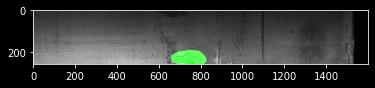

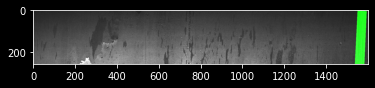

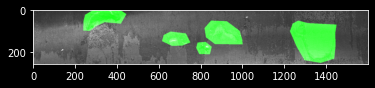

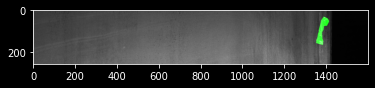

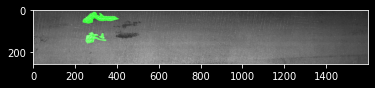

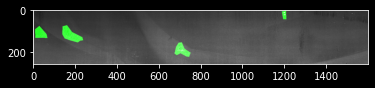

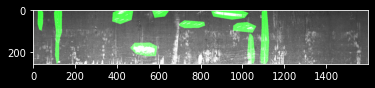

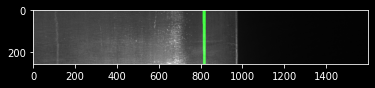

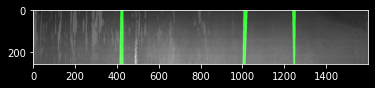

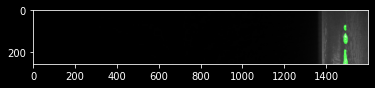

In [ ]:
for i in np.random.randint(0, defect_class_mask_df.shape[0], 20):

    img_ = io.imread(os.path.join(train_dir, defect_class_mask_df['ImageId'][i]))
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)

    mask_ = rle2mask(rle = defect_class_mask_df['EncodedPixels'][i], 
                     height = img_.shape[0], 
                     width = img_.shape[1])
    
    img_[mask_ == 1, 1] = 255
    plt.figure()
    plt.imshow(img_)

In [ ]:
# train test df from df
# image generators from train for train and validation
# import relu and freeze layers 
# add dense, earlystopping, checkpoint layers
# compile and fit

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(all_images_df, test_size = .25)
print(train.shape, test.shape)

(9747, 2) (3250, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_generator = ImageDataGenerator(rescale = 1./255, validation_split = .25)

training_set = img_generator.flow_from_dataframe(
    dataframe = train, 
    directory = train_dir,
    target_size = (256, 256), 
    class_mode = 'other', 
    batch_size = 16, 
    shuffle = True,
    subset = 'training', 
    x_col = 'ImageID', 
    y_col = 'label')

validation_set = img_generator.flow_from_dataframe(
    dataframe = train,
    directory = train_dir,
    x_col = 'ImageID',
    y_col = 'label',
    target_size = (256, 256),
    class_mode = 'other',
    batch_size = 16,
    shuffle = True,
    subset = 'validation'
)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 7311 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 2436 validated image filenames.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = (Input(shape = (256, 256, 3))))

In [ ]:
for layer in basemodel.layers:
    layer.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4, 4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256, activation = 'relu')(headmodel)
headmodel = Dropout(.3)(headmodel)
headmodel = Dense(1, activation = 'sigmoid')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)
model.compile(loss = 'binary_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])

stopper = EarlyStopping(patience = 5, monitor = 'val_accuracy')
checkpoint = ModelCheckpoint('weights.hdf5', monitor = 'val_accuracy', save_best_only = True)

In [ ]:
history = model.fit_generator(generator = training_set, 
                              steps_per_epoch = training_set.n // 16,
                              epochs = 50, 
                              callbacks = [stopper, checkpoint],
                              validation_data = validation_set, 
                              validation_steps = validation_set.n // 16)

In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/udemy - ml ai ds refresher/Data Science for Business Package/6. Maintenance Department'

In [ ]:
# read model from drive
model_path = '/content/drive/MyDrive/Colab Notebooks/udemy - ml ai ds refresher/Data Science for Business Package/6. Maintenance Department/resnet-classifier-model.json'

# save as json
with open(model_path) as json_model:
    json_model_ = json_model.read()

# load model from json
from tensorflow.keras.models import model_from_json

model_ = model_from_json(json_model_)

In [ ]:
model_.weights

In [ ]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_generator = test_data_gen.flow_from_dataframe(
    dataframe = test,
    directory = train_dir,
    x_col = 'ImageID',
    y_col = None,
    target_size = (256, 256),
    class_mode = None,
    batch_size = 16,
    shuffle = False)

Found 3250 validated image filenames.


In [ ]:
preds = model_.predict(test_generator, steps = test_generator.n // 16, verbose = 1)

  6/203 [..............................] - ETA: 35:31